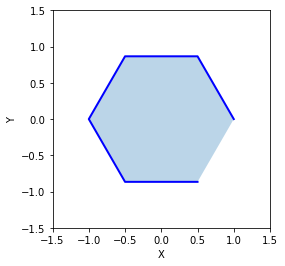

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def hexagon_graph():
    # Define the coordinates of the hexagon vertices
    radius = 1.0
    angles = np.linspace(0, 2 * np.pi, 7)[:-1]  # Divide the circle into 6 equal parts
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)

    # Plot the hexagon
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(x, y, 'b-', linewidth=2)
    ax.fill(x, y, alpha=0.3)  # Fill the hexagon with a color

    # Set axis limits and labels
    ax.set_xlim([-1.5 * radius, 1.5 * radius])
    ax.set_ylim([-1.5 * radius, 1.5 * radius])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show the plot
    plt.show()

# Call the function to create the hexagon graph
hexagon_graph()


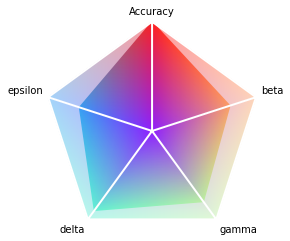

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

proportions = [1, 0.75, 0.8, 0.9, 0.7]
labels = ['Accuracy', 'beta', 'gamma', 'delta', 'epsilon']
N = len(proportions)
proportions = np.append(proportions, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.show()

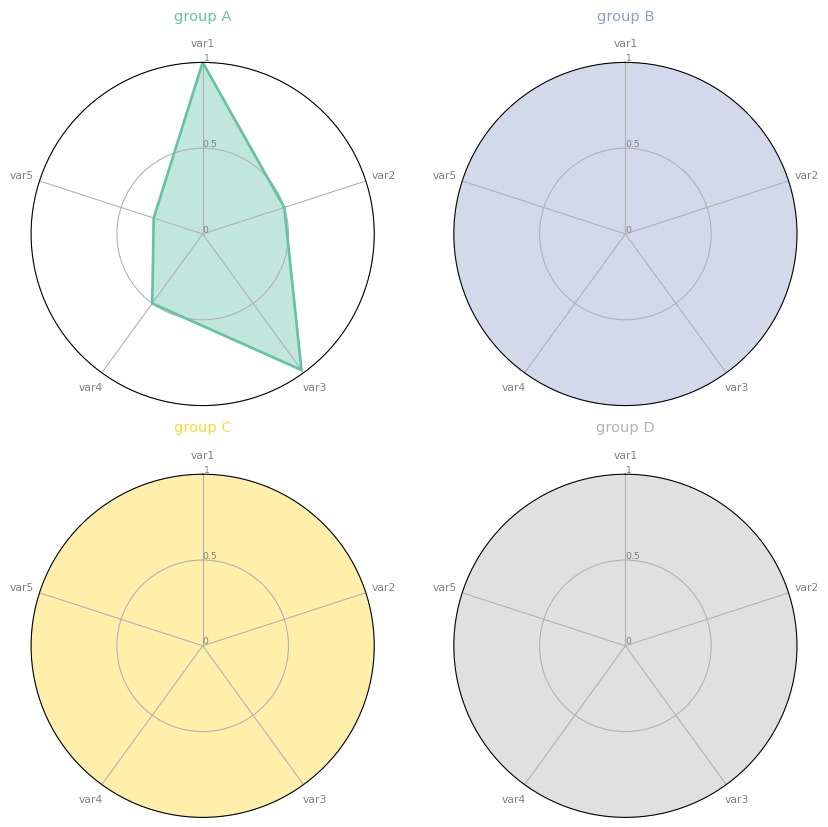

In [3]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [1, 1.5, 30, 4],
'var2': [0.5, 10, 9, 34],
'var3': [0.98, 39, 23, 24],
'var4': [0.5, 31, 33, 14],
'var5': [0.3, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

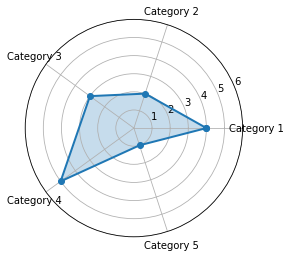

In [4]:

def spider_plot():
    # Define the categories and the values for each category
    categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
    values = [4, 2, 3, 5, 1]

    # Calculate the angle at which each category is located on the plot
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Include the starting angle at the end to close the plot

    # Plot the spider plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)  # Create a polar plot
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)  # Connect the points with lines
    ax.fill(angles, values + values[:1], alpha=0.25)  # Fill the area enclosed by the lines with color

    # Set the labels for each category
    ax.set_xticks(angles[:-1])  # Set the positions of the labels
    ax.set_xticklabels(categories)  # Set the labels for each position

    # Set the maximum value of the radial axis
    max_value = max(values)
    ax.set_ylim(0, max_value + 1)

    # Set a grid for better visualization
    ax.grid(True)

    # Show the plot
    plt.show()

# Call the function to create the spider plot
spider_plot()


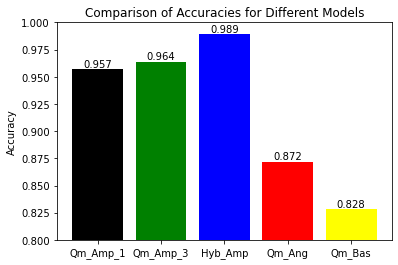

In [53]:
import matplotlib.pyplot as plt

def bar_plot():
    # Define the machine learning models and their corresponding accuracies
    models = ['Qm_Amp_1', 'Qm_Amp_3', 'Hyb_Amp', 'Qm_Ang', 'Qm_Bas']
    accuracies = [0.957, 0.964, 0.989, 0.872, 0.828]

    # Plot the bar plot
    fig, ax = plt.subplots()
    bars = ax.bar(models, accuracies, color=("black", "green", "blue", "red", "yellow"))

    # Set labels and title
    ax.set_ylabel('Accuracy')
    ax.set_title('Comparison of Accuracies for Different Models')
    ax.set_ylim(0.8, 1)

    # Add accuracy values below each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

    # Save the plot as a PNG file
    fig.savefig('accs.png')

    # Show the plot
    plt.show()


# Call the function to create the bar plot
bar_plot()


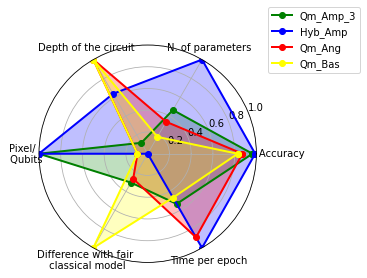

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def spider_plot():
    # Define the categories and the values for each category
    categories = ['       Accuracy', 'N. of parameters', 'Depth of the circuit', 'Pixel/  \n Qubits', 'Difference with fair \n classical model', 'Time per epoch']
    
    # Define the data for each polygon
    data = [
        [0.964, 78/(168), 22/190, 64/6 / (64/6), 0.023/0.075, 24/45],  # Data for the second polygon
        [0.989, 168/(168), 121/190, 64/6 / (64/6), 0, 45/45],  # Data for the third polygon
        [0.872, 57/(168), 190/190, 1 / (64/6), 0.02/0.075, 40/45],  # Data for the forth polygon
        [0.828, 30/(168), 190/190, 1 / (64/6), 0.075/0.075, 21/45]   # Data for the fifth polygon
    ]
    
    # Define the colors for each polygon
    colors = [ 'green', 'blue','red', 'yellow']

    # Define the labels for the legend
    labels = ['Qm_Amp_3', 'Hyb_Amp', 'Qm_Ang', 'Qm_Bas']

    # Calculate the angle at which each category is located on the plot
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Include the starting angle at the end to close the plot

    # Plot the spider plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)  # Create a polar plot

    for d, c, label in zip(data, colors, labels):
        ax.plot(angles, d + d[:1], 'o-', linewidth=2, color=c, label=label)  # Connect the points with lines
        ax.fill(angles, d + d[:1], alpha=0.25, color=c)  # Fill the area enclosed by the lines with color

    # Set the labels for each category
    ax.set_xticks(angles[:-1])  # Set the positions of the labels
    ax.set_xticklabels(categories)  # Set the labels for each position

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    # Set a grid for better visualization
    ax.grid(True)

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))

    # Show the plot
    plt.show()
    fig.savefig('spy2.png')


# Call the function to create the spider plot
spider_plot()


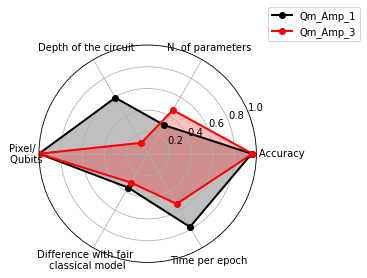

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def spider_plot():
    # Define the categories and the values for each category
    categories = ['       Accuracy', 'N. of parameters', 'Depth of the circuit', 'Pixel/  \n Qubits', 'Difference with fair \n classical model', 'Time per epoch']
    
    # Define the data for each polygon
    data = [
        [0.957, 51/(168), 113/190, 64/6 / (64/6), 0.027/0.075, 35/45],  # Data for the first polygon
        [0.964, 78/(168), 22/190, 64/6 / (64/6), 0.023/0.075, 24/45],  # Data for the second polygon
    ]
    
    # Define the colors for each polygon
    colors = ['black', 'red']

    # Define the labels for the legend
    labels = ['Qm_Amp_1', 'Qm_Amp_3']

    # Calculate the angle at which each category is located on the plot
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Include the starting angle at the end to close the plot

    # Plot the spider plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)  # Create a polar plot

    for d, c, label in zip(data, colors, labels):
        ax.plot(angles, d + d[:1], 'o-', linewidth=2, color=c, label=label)  # Connect the points with lines
        ax.fill(angles, d + d[:1], alpha=0.25, color=c)  # Fill the area enclosed by the lines with color

    # Set the labels for each category
    ax.set_xticks(angles[:-1])  # Set the positions of the labels
    ax.set_xticklabels(categories)  # Set the labels for each position

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    # Set a grid for better visualization
    ax.grid(True)

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))

    # Show the plot
    plt.show()
    fig.savefig('spy1.png')


# Call the function to create the spider plot
spider_plot()
